# Important Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2

load image 

In [5]:
original_img=cv2.imread('download.jpeg')

# image in plx

In [6]:
original_img

array([[[ 70, 118,  90],
        [ 77, 125,  97],
        [ 94, 143, 115],
        ...,
        [165, 154, 132],
        [160, 148, 124],
        [158, 146, 122]],

       [[ 34,  83,  55],
        [ 10,  59,  31],
        [ 42,  93,  65],
        ...,
        [163, 152, 130],
        [157, 145, 121],
        [155, 143, 119]],

       [[ 89, 142, 115],
        [ 36,  89,  62],
        [ 31,  86,  59],
        ...,
        [161, 150, 128],
        [154, 142, 118],
        [151, 139, 115]],

       ...,

       [[ 62, 142, 119],
        [ 85, 165, 142],
        [ 97, 180, 155],
        ...,
        [ 24,  64,  46],
        [ 26,  64,  46],
        [ 24,  64,  46]],

       [[ 75, 157, 134],
        [ 65, 147, 124],
        [ 91, 174, 149],
        ...,
        [ 29,  69,  51],
        [ 31,  69,  51],
        [ 29,  69,  51]],

       [[ 86, 170, 146],
        [ 66, 150, 126],
        [ 52, 136, 111],
        ...,
        [ 45,  87,  69],
        [ 32,  72,  54],
        [ 21,  63,  45]]

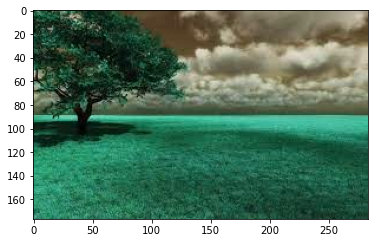

In [7]:
plt.imshow(original_img)

In [8]:
IMG=cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)

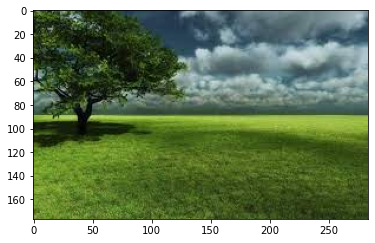

In [9]:
plt.imshow(IMG)

In [10]:
verctorized=IMG.reshape((-1,3))

In [11]:
verctorized=np.float32(verctorized)

In [12]:
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

In [38]:
k=5
attempts=10
ret,label,center=cv2.kmeans(verctorized,k,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

In [39]:
center=np.uint8(center)

In [40]:
res=center[label.flatten()]
result_image=res.reshape((IMG.shape))

(Text(0.5, 1.0, 'Segmented image when k= 5 '), ([], []), ([], []))

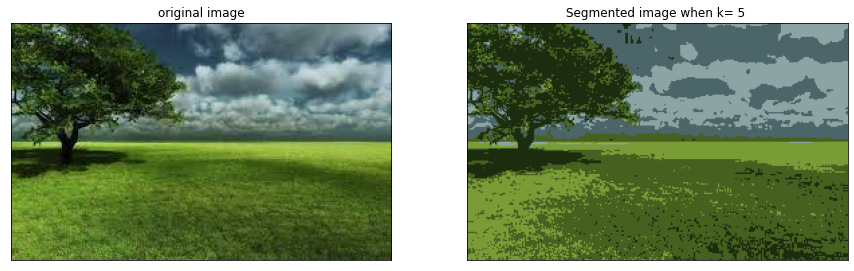

In [41]:
figure_size=15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(IMG)
plt.title('original image'),(plt.xticks([])),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented image when k= %i ' %k),plt.xticks([]),plt.yticks([])

In [42]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(verctorized)
    wcss.append(kmeans.inertia_)

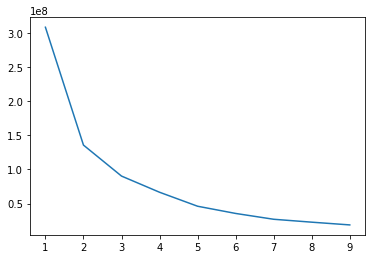

In [24]:
plt.plot([1,2,3,4,5,6,7,8,9],wcss)